# Name: Vatsal Vinay Parikh

# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination -

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

## Loading Dataset and Importing libraries

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2254502445,20140530T000000,3,1.00,1220.0,4800,1.0,0,0.0,3,...,1220,0,1901,0,98122,47.6101,-122.307,1200,4800,3.85
1,126059019,20150316T000000,4,2.50,3170.0,94855,1.0,0,0.0,4,...,1910,1260,1978,0,98072,47.7648,-122.112,2590,65340,7.99
2,8825900020,20140811T000000,5,3.00,2710.0,4200,2.0,0,0.0,3,...,1890,820,1919,2014,98115,47.6754,-122.307,2150,4200,9.25
3,9465910380,20141024T000000,4,2.25,2850.0,7453,2.0,0,NaN,3,...,2850,0,1991,0,98072,47.7439,-122.174,2700,8468,5.40
4,7784400060,20150120T000000,3,2.50,2370.0,9000,1.0,0,3.0,4,...,1570,800,1952,0,98146,47.4922,-122.365,2120,9500,5.45


## Data Analysis

Explore the data to find any relationship between the target variable and the input variables.

Start with providing some descriptive statistics of the data with visualizations.

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label.

**Explore the data.**

In [4]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           18693 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    18857 non-null  float64
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           18478 non-null  float64
 9   condition      19451 non-null  int64  
 10  grade          18078 non-null  float64
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqft_l

- The above code uses the info() method to obtain a summary of the DataFrame.
- With 21 columns and 19451 entries, the DataFrame has various numeric data types, such as integers (int64) and floats (float64), alongside an object data type (object) for the date column.









**Providing some descriptive statistics of the data with visualizations.**


In [5]:
# Describing the statistical values of each features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19451.0,4.579305e+09,2.876637e+09,1.000102e+06,2.124084e+09,3.904921e+09,7.304801e+09,9.900000e+09
bedrooms,19451.0,3.374891e+00,9.318775e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,19451.0,2.117115e+00,7.706026e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,18857.0,2.083823e+03,9.216559e+02,2.900000e+02,1.430000e+03,1.920000e+03,2.550000e+03,1.354000e+04
sqft_lot,19451.0,1.526233e+04,4.246746e+04,5.200000e+02,5.043000e+03,7.620000e+03,1.071800e+04,1.651359e+06
floors,19451.0,1.496607e+00,5.400550e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19451.0,7.608863e-03,8.689854e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,18478.0,2.337915e-01,7.641087e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,19451.0,3.408308e+00,6.508534e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,18078.0,7.656710e+00,1.174811e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


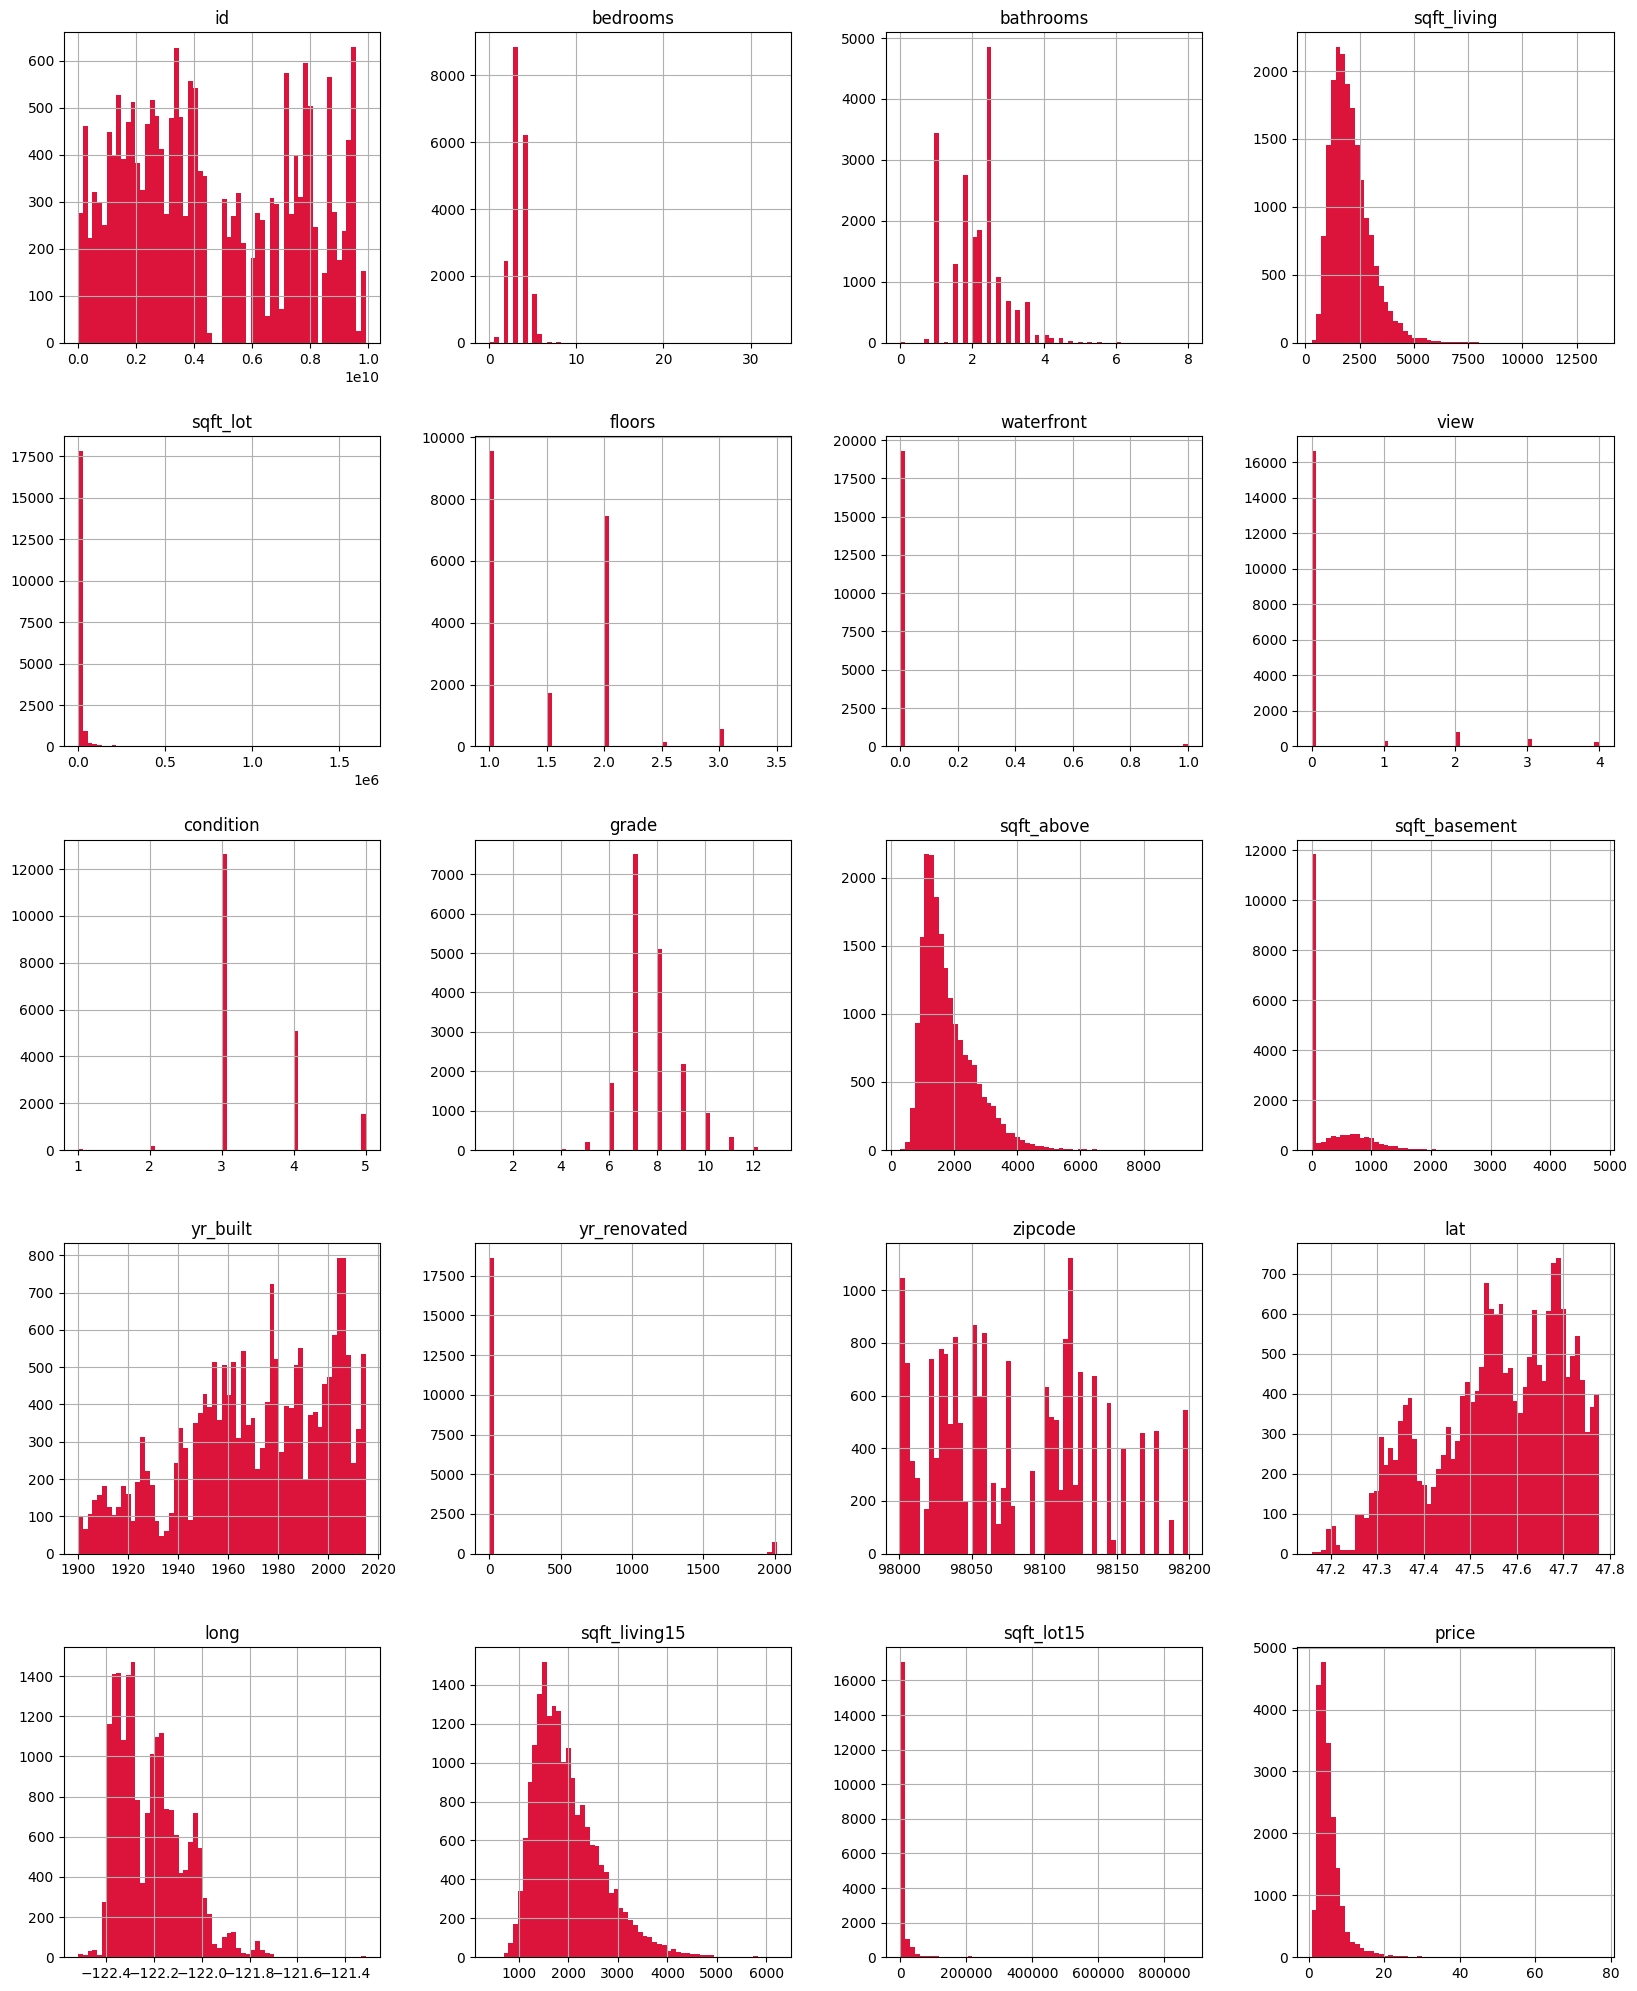

In [6]:
#Plotting histogram for each attributes
data.hist(bins=60, figsize=(20,25), color='crimson')
plt.show()

From the histogram it can be found out that the features - sqft_living, sqft_above, sqft_living15 and price are found to be normally distributed with the former two slightly skewed to the left.


**Are there any missing values?**

In [7]:
# Find missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64


- The above code deals with identifying missing values in the dataset.
- The output shows the columns with missing values along with their respective counts.
- It is found out that the columns 'date', 'sqft_living', 'view' and 'grade' are having missing values.

In [8]:
data_copy = data.drop('date', axis=1)

**Are there any outliers?**

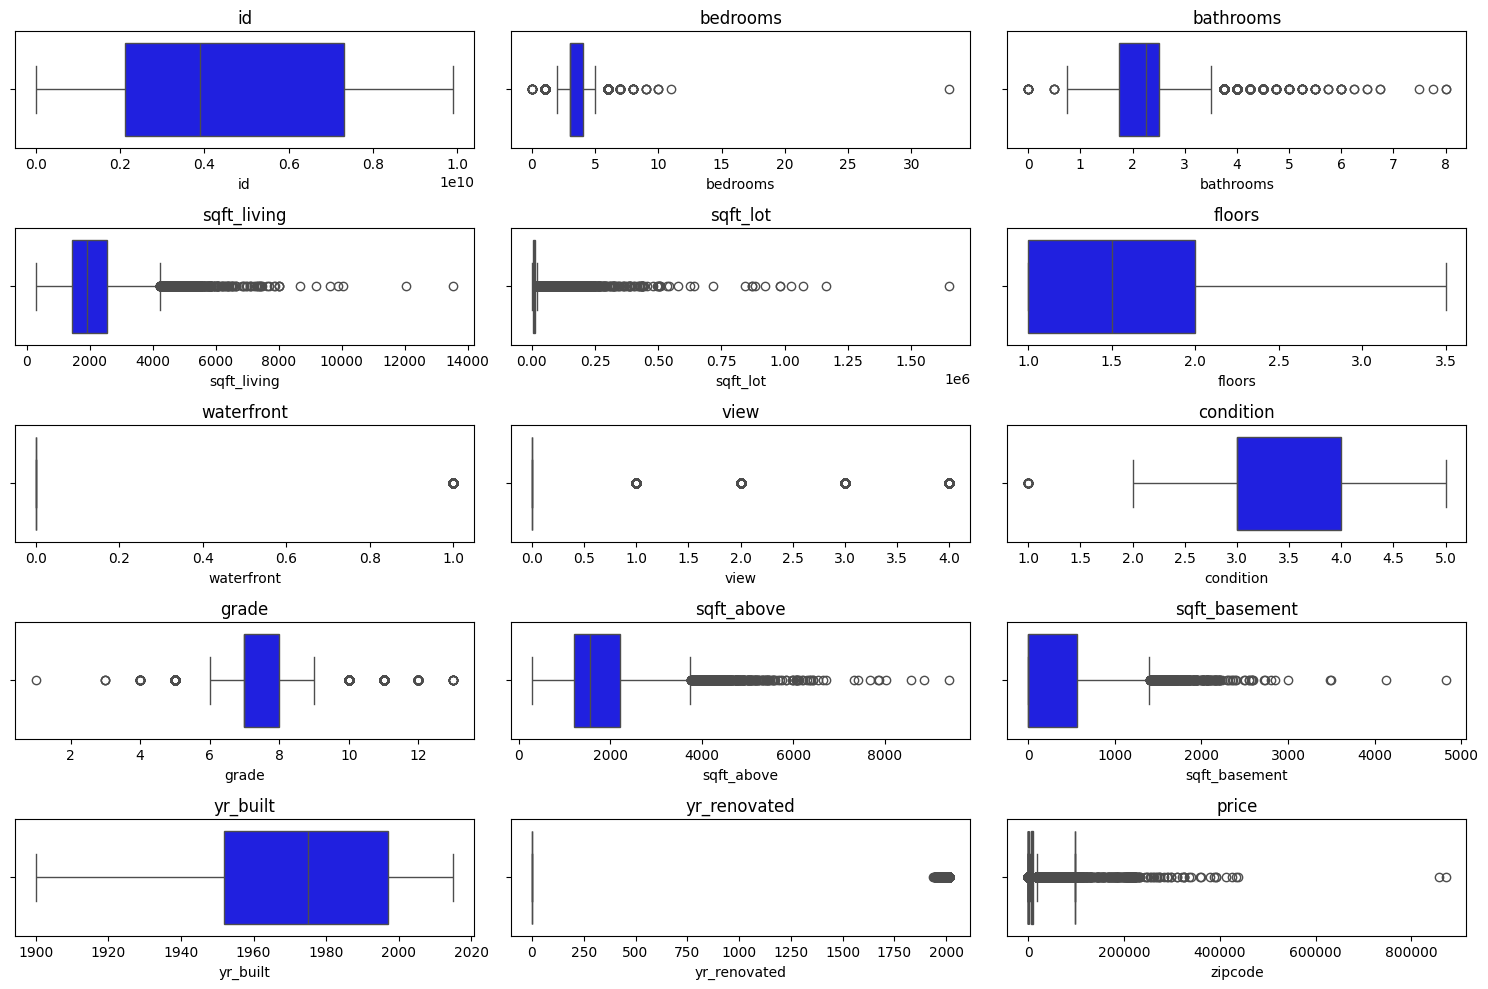

In [9]:
# Checking for outliers

plt.figure(figsize=(15, 10))
for i, col in enumerate(data_copy.columns, 1):
    plt.subplot(5, 3, min(i, 15))
    sns.boxplot(x=data_copy[col], color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

By analysing boxplots for each attributes we identify that the following columns contains outliers:
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- price

**What is the relationship between the input variables and the target variable?**

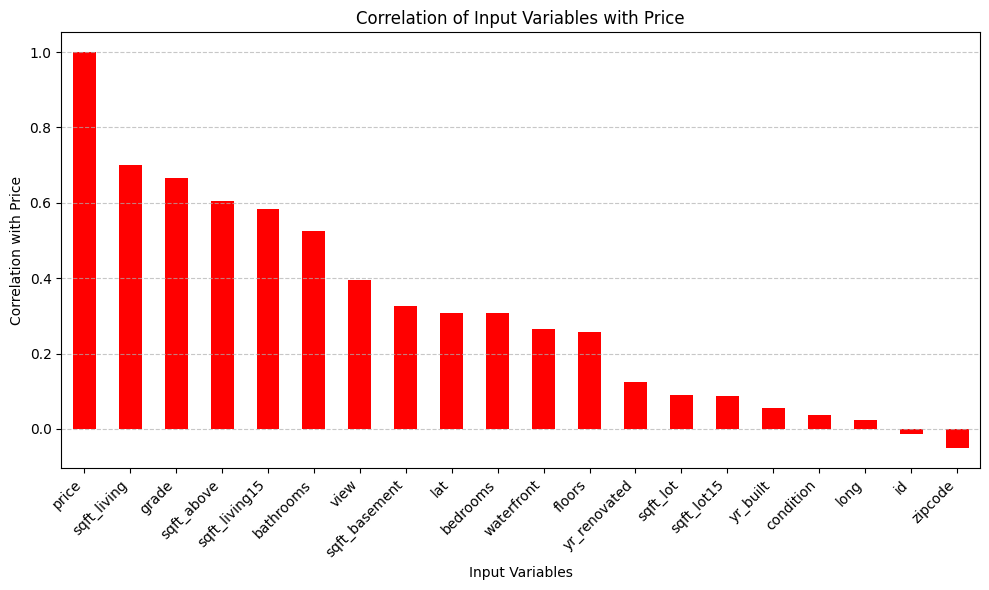

In [10]:
# Calculate correlation coefficients
correlation_matrix = data.corr()

# Extract correlation values with the target variable (price)
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Plot correlation values
plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar', color='red')
plt.title('Correlation of Input Variables with Price')
plt.xlabel('Input Variables')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The above code calculates the correlation coefficients between the input variables and the target variable (price) in the dataset to analyse their relationship.
- We visualize these correlation values using a bar plot, where each input variable and its corresponding correlation coefficient with the price are depicted.
- From the graph, we identify that the most significant attributes having correlation greater than 0.4 with the price variable include:
  1. sqft_living
  2. grade
  3. sqft_above
  4. sqft_living15
  5. bathrooms




**Show some statistical plots to get some insights about the relationship between data attributes**

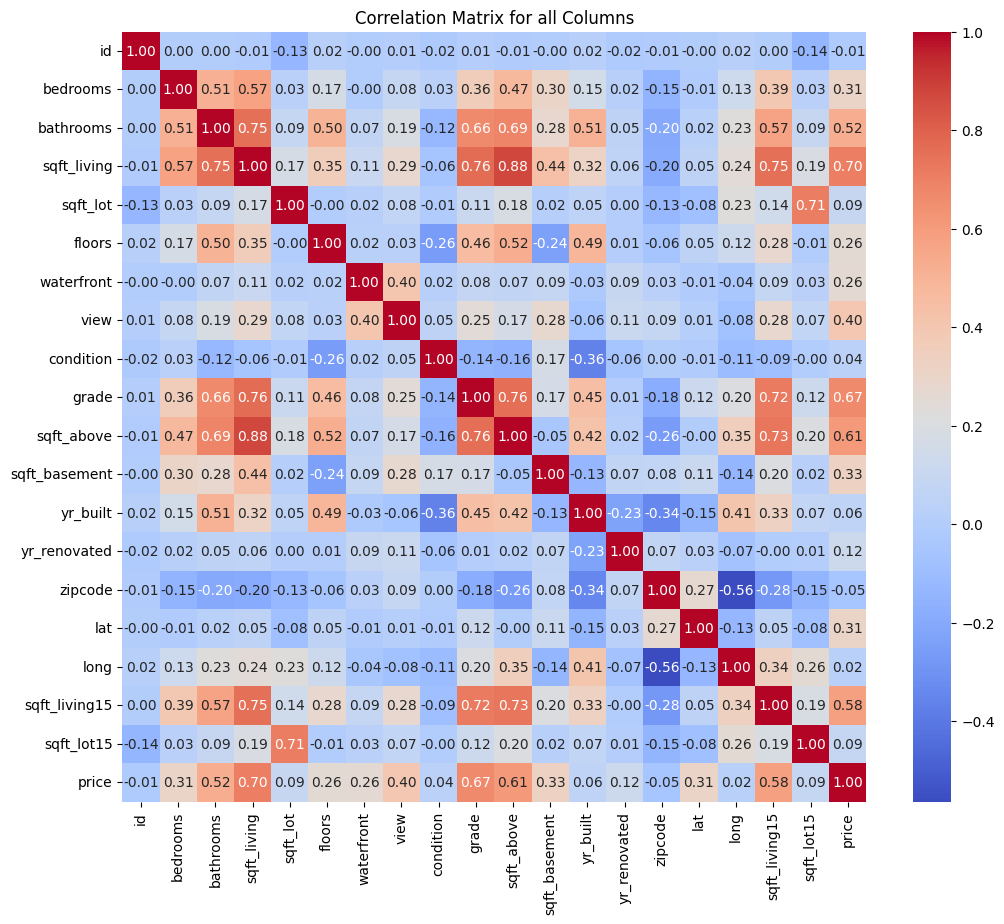

In [11]:
# Create heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for all Columns')
plt.show()

- Each cell in the heatmap above represents the correlation coefficient between two variables, with colors indicating the strength and direction of the correlation.
- The most correlated attribute with the price attribute is sqft_living with a score of 0.70 whereas id is the least significant with only 0.01 score.

**Show some statistical plots to get some insights about the relationship between data attibutes with the label.**

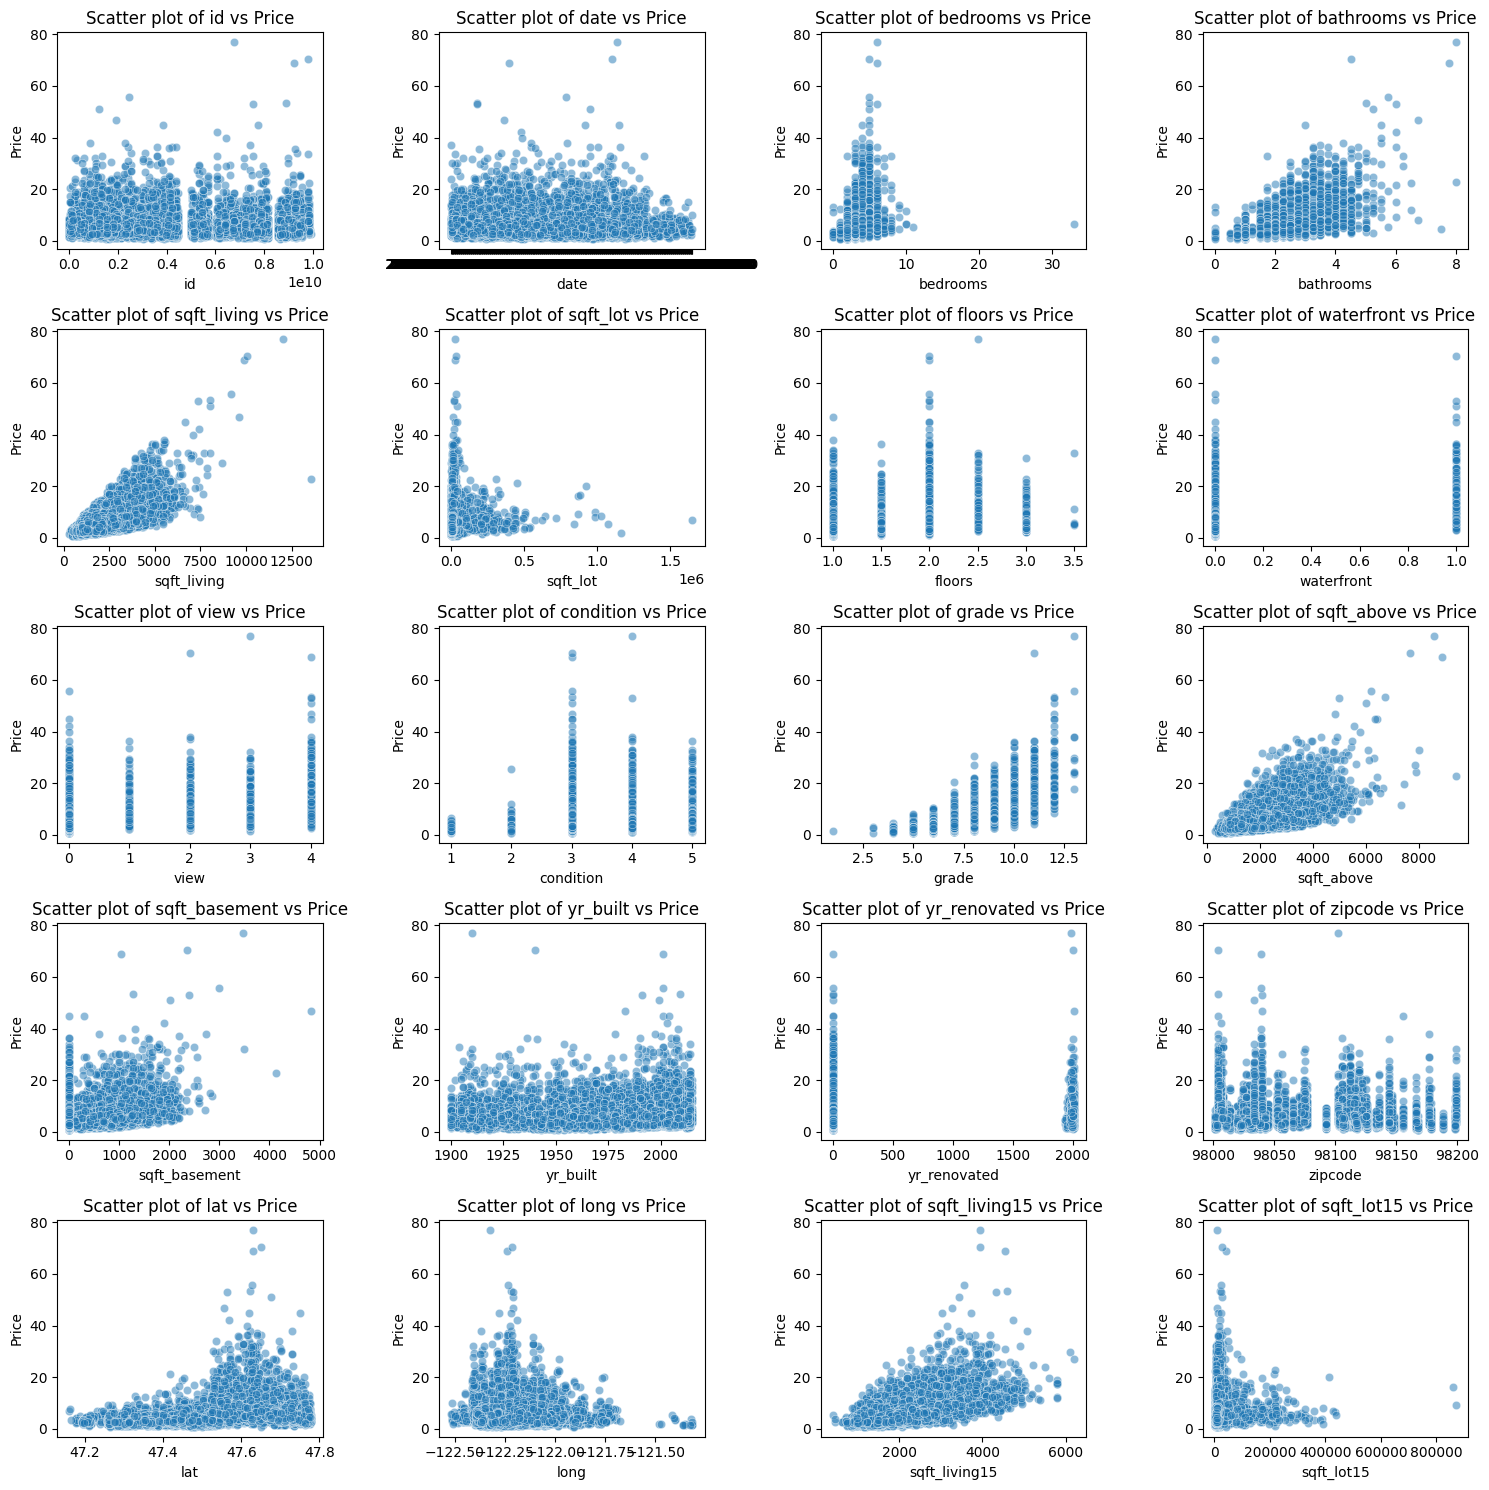

In [12]:
num_cols = len(data.columns[:-1])
num_rows = (num_cols + 3) // 4

data_temp = data

# Create scatter plots of price against all columns
plt.figure(figsize=(15, 3 * num_rows))
for i, col in enumerate(data_temp.columns[:-1], 1):
    plt.subplot(num_rows, 4, i)
    sns.scatterplot(x=data[col], y=data['price'], alpha=0.5)
    plt.title(f'Scatter plot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

- The code generates scatter plots of the target variable (price) against each input variable in the dataset.
- These plots help visualize the relationship between the target variable and each input feature individually, showing whether there is a linear or non-linear relationship, any outliers, and the overall trend.


## Data pre-processing & Feature Engineering

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data.

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

**How are you going to deal with the missing values?**

In [13]:
# Filling missing values with mean
data.fillna(data.mean(), inplace=True)
data['date'].fillna(data['date'].mode()[0], inplace=True)

# Checking for missing values after filling
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


- The above code addresses missing values in the dataset by filling them with appropriate measures.
- Numeric columns, except for the 'date' column, have missing values replaced with the mean of each respective column, while missing values in the 'date' column are filled with the mode (most frequent value).
- This step is necessary to ensure data the completeness of data.






**How are you going to deal with the numerical and categorical columns?**

**Performing Statistical test - ANOVA**

In [14]:
# Split the dataset into features and target variable
X = data.drop(columns=['price','date'])
y = data['price']

# Perform ANOVA
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Get the p-values from ANOVA
p_values = selector.pvalues_

# Print the p-values for each feature
for i, column in enumerate(X.columns):
    print(f'Feature: {column}, p-value: {p_values[i]}')

Feature: id, p-value: 0.020894900172907786
Feature: bedrooms, p-value: 3.830417640670653e-88
Feature: bathrooms, p-value: 0.0
Feature: sqft_living, p-value: 0.0
Feature: sqft_lot, p-value: 0.9999999893056701
Feature: floors, p-value: 8.99933471255031e-75
Feature: waterfront, p-value: 0.0
Feature: view, p-value: 4.191028899833359e-279
Feature: condition, p-value: 0.01633251954181634
Feature: grade, p-value: 0.0
Feature: sqft_above, p-value: 0.0
Feature: sqft_basement, p-value: 1.750930122594009e-150
Feature: yr_built, p-value: 3.285151270959958e-18
Feature: yr_renovated, p-value: 4.1611766058976833e-19
Feature: zipcode, p-value: 0.0033232931320295507
Feature: lat, p-value: 0.0
Feature: long, p-value: 0.7452004564313461
Feature: sqft_living15, p-value: 0.0
Feature: sqft_lot15, p-value: 0.9999999999999987


- To handle both numerical and categorical columns, we utilize the ANOVA (Analysis of Variance) technique.

- The p-values obtained from ANOVA are used to assess the significance of each feature. For both the features, p-values close to zero indicate a strong correlation with the target variable.

- In this case, features with p-values greater than a certain threshold (e.g., 0.05) are considered non-significant.






In [15]:
print(correlation_with_price)

price            1.000000
sqft_living      0.701704
grade            0.665681
sqft_above       0.605934
sqft_living15    0.584644
bathrooms        0.524262
view             0.395551
sqft_basement    0.326884
lat              0.307145
bedrooms         0.306935
waterfront       0.264473
floors           0.256882
yr_renovated     0.123388
sqft_lot         0.090477
sqft_lot15       0.086115
yr_built         0.055500
condition        0.036918
long             0.024295
id              -0.014091
zipcode         -0.051596
Name: price, dtype: float64


- The correlations between each feature and the target variable (price) are calculated.
- Features with higher correlations are likely to have a stronger influence on price prediction.
- The correlations are sorted in descending order to identify the most influential features.



**Are all the attributes relevant?**

In [16]:
# Drop non-significant features
X_selected = X.drop(columns=['id', 'date'])

Based on the above tests conducted, it is found out that the columns 'id' and 'date' are irrelevant and thus are removed from the dataset.

**Does any feature need to be reengineered?**

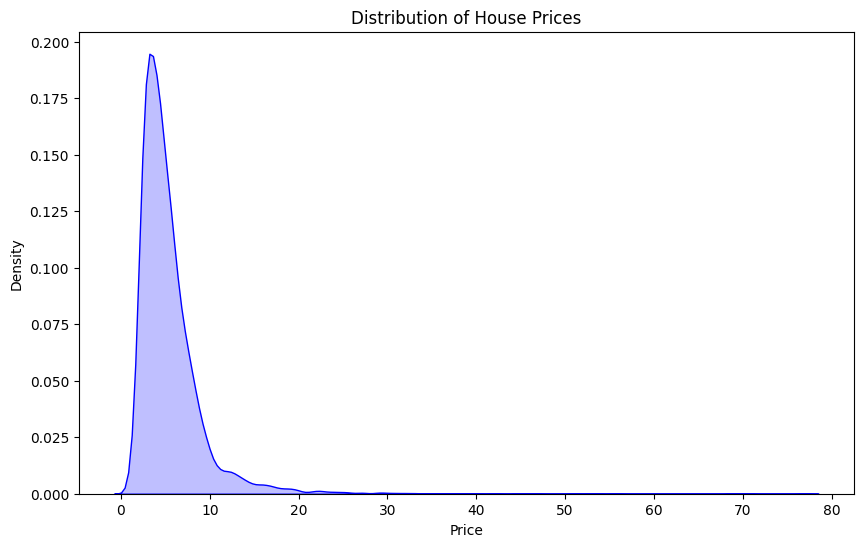

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['price'], color='blue', fill=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

- By analysing the distribution of house prices, it can be inferred that the distribution is heavily right-skewed, indicating the presence of outliers.
- So, re-engineering the price feature would be extremely helpful, more significantly because it is a target variable.

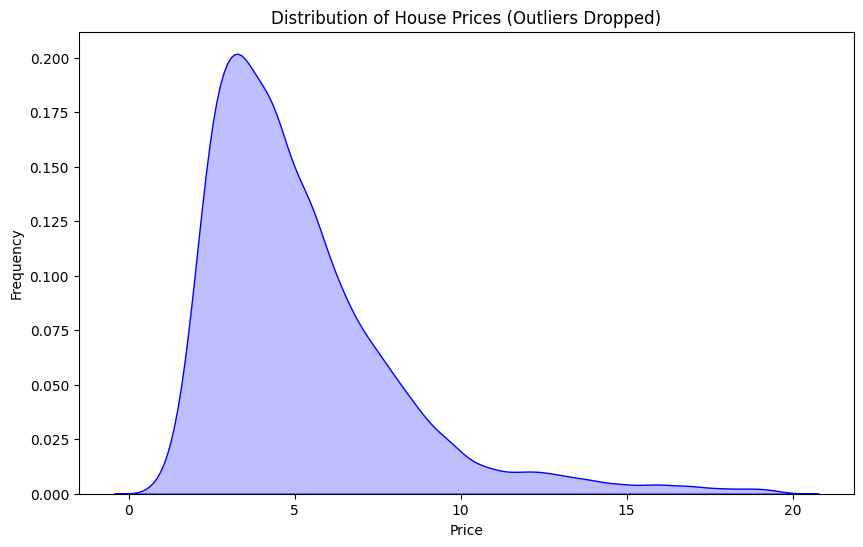

In [18]:
price_99th_percentile = data['price'].quantile(0.99)

# Filter the DataFrame to keep only rows where the price is below the 99th percentile
data = data[data['price'] <= price_99th_percentile]

# Plot the distribution of house prices after dropping outliers
plt.figure(figsize=(10, 6))
sns.kdeplot(data['price'], color='blue', fill=True)
plt.title('Distribution of House Prices (Outliers Dropped)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

-  To address this, the 99th percentile of house prices is calculated, and rows with prices above this percentile are filtered out, effectively removing outliers.
- By plotting the distribution of house prices after dropping outliers, a more normalized distribution is achieved.

**Feature Engineering - Standard Scaler**

In [19]:
# Extract list of column names from X_selected
selected_features = X_selected.columns.tolist()

X_train = data[selected_features]
y_train = data['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

- The above code segment involves feature engineering using the Standard Scaler technique.
- The StandardScaler() function is utilized to scale the training features (X_train) using the fit_transform() method, resulting in the standardized feature matrix X_scaled.
- This process ensures that all features have a mean of 0 and a standard deviation of 1, making them suitable for training machine learning models.







**Splitting the Dataset**

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15404, 18)
Shape of X_test: (3852, 18)
Shape of y_train: (15404,)
Shape of y_test: (3852,)


- We split the standardized features (X_scaled) and the target variable (y_train) into training (80%) and testing sets (20%).
- This step is crucial for evaluating the performance of machine learning models on unseen data.

## Modeling

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

**Evaluating models using RMSE as the evaluation metric and reporting the 5CV Validation score**

In [21]:
# Dictionary to store RMSE scores for each model
rmse_scores = {}

# Define the models with hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost Regression': XGBRegressor(),
}

# Perform 5-fold cross-validation and report RMSE
print("5-Fold Cross Validation Results:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores[name] = np.sqrt(-cv_scores.mean())
    print(f'{name}: {rmse_scores[name]:.4f}')

5-Fold Cross Validation Results:
Linear Regression: 1.5496
Ridge Regression: 1.5496
Lasso Regression: 2.2725
ElasticNet Regression: 1.5756
Random Forest Regression: 1.0579
Gradient Boosting Regression: 1.0935
XGBoost Regression: 1.0217


The evaluation of various regression models using 5-fold cross-validation reveals insightful findings regarding their performance in predicting house prices:

 - Among the models tested, XGBoost Regression demonstrates the lowest RMSE score of 1.0217, indicating that it provides the best price prediction as compared to other models.
 - Random Forest Regression also performs well with an RMSE score of 1.0579.
 - However, Lasso Regression exhibits a relatively higher RMSE score of 2.2725, suggesting below par performance for this dataset.


**Reporting RMSE score on Test Data**

In [22]:
# Fit each model to the training data and make predictions on the test data
print("\nTest Set Results:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name} Test RMSE: {test_rmse:.4f}')


Test Set Results:
Linear Regression Test RMSE: 1.5853
Ridge Regression Test RMSE: 1.5852
Lasso Regression Test RMSE: 2.2694
ElasticNet Regression Test RMSE: 1.5988
Random Forest Regression Test RMSE: 1.0232
Gradient Boosting Regression Test RMSE: 1.0945
XGBoost Regression Test RMSE: 0.9872


- After evaluating the trained models by predicting on the test dataset, XGBoost Regression demonstrates the lowest RMSE of 0.9872, Random Forest Regression also performs well, with an RMSE of 1.0232.

**Evaluating models using R2 score**

In [23]:
# Evaluate models using 5-fold cross-validation with R2 score as the scoring metric
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r2_scores = scores
    print(f'{name}:')
    print("Mean R2 score:", np.mean(r2_scores))

Linear Regression:
Mean R2 score: 0.7040749154231879
Ridge Regression:
Mean R2 score: 0.704076492153043
Lasso Regression:
Mean R2 score: 0.36392158190930246
ElasticNet Regression:
Mean R2 score: 0.6941179774984318
Random Forest Regression:
Mean R2 score: 0.8627805161352239
Gradient Boosting Regression:
Mean R2 score: 0.8525166801346513
XGBoost Regression:
Mean R2 score: 0.8714328520676368


- Using R2 score as the evaluation metric provides another perspective on the performance of the models.
- Linear Regression, Ridge Regression, ElasticNet Regression exhibit relatively high mean R2 scores, approximately around 0.70.
- Random Forest Regression and Gradient Boosting Regression also perform well, with mean R2 scores of 0.86 and 0.85, respectively.
- Overall, XGBoost Regression outputs the highest R2 score of 0.87.

**Plotting Scatter Plots for each model on Actual vs Predicted Prices**

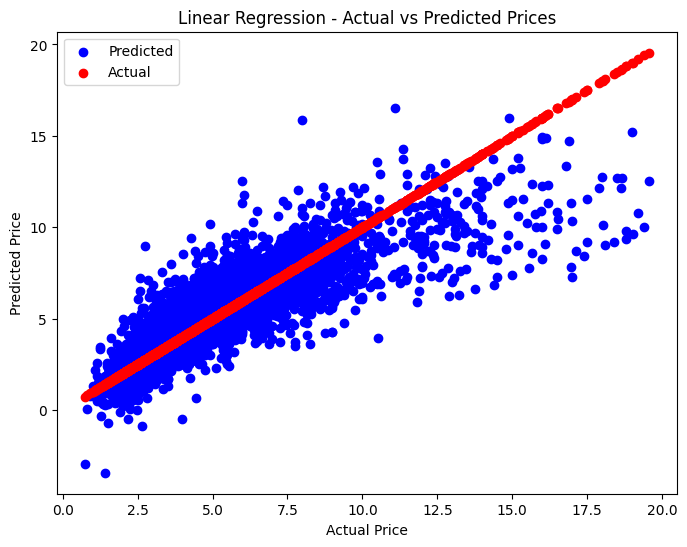

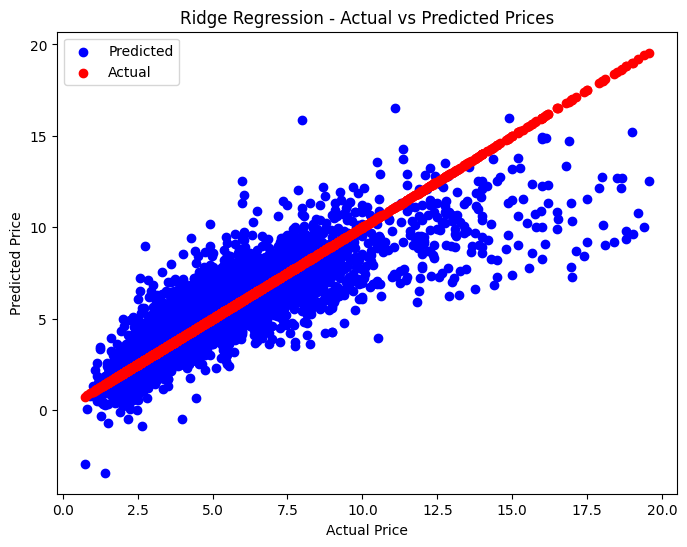

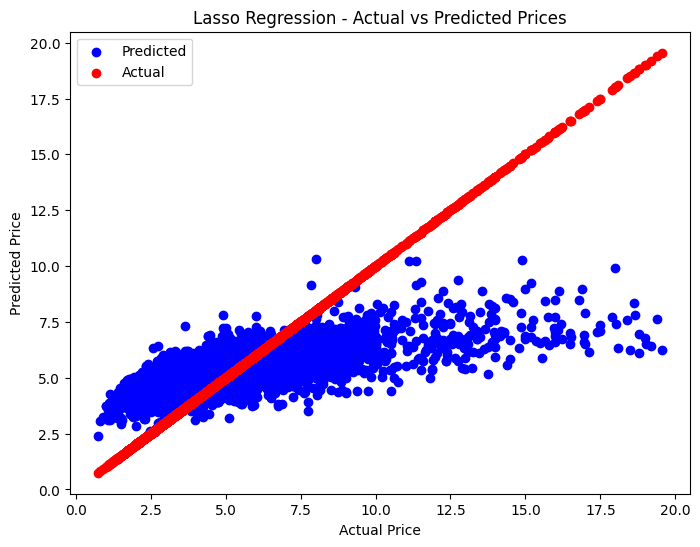

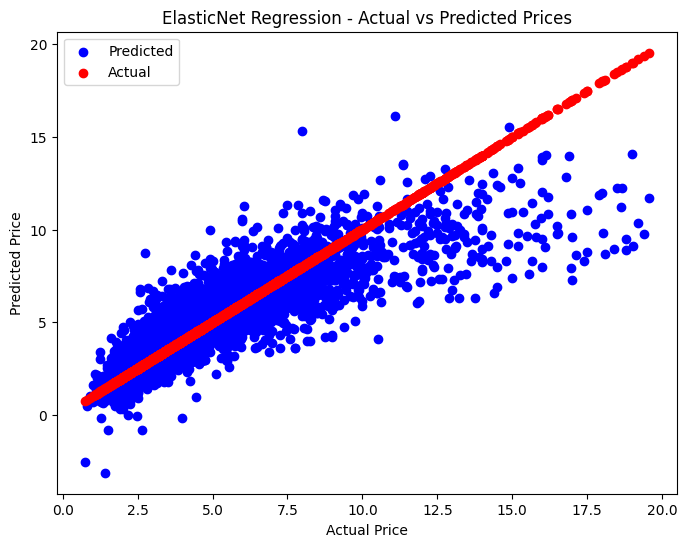

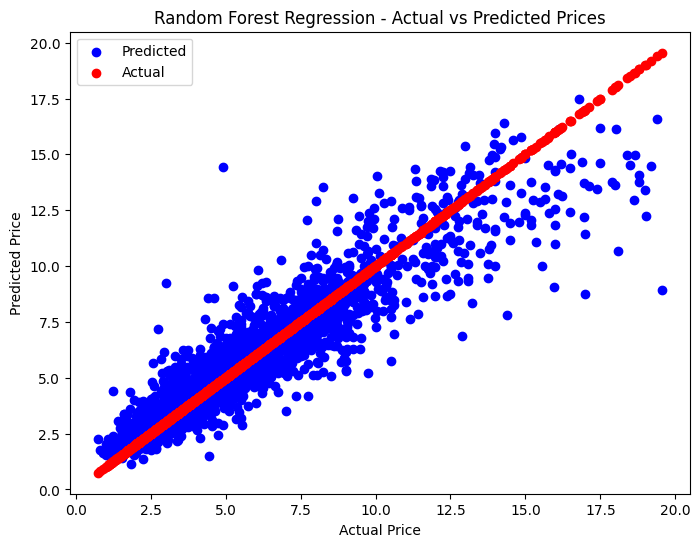

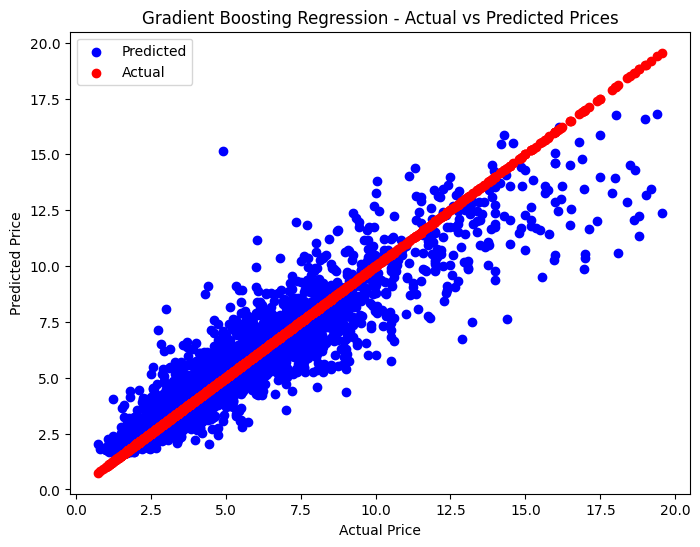

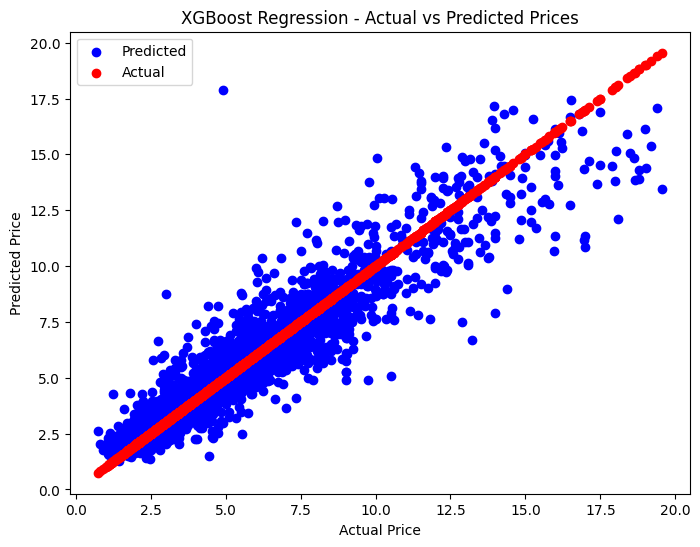

In [24]:
# Plotting for each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.scatter(y_test, y_test, color='red', label='Actual')
    plt.title(f'{name} - Actual vs Predicted Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()


- The scatter plots illustrate the relationship between the actual and predicted prices for each model.
- In each plot, the blue dots represent the predicted prices, while the red dots represent the actual prices.
- Ideally, all points would lie along the diagonal line, indicating perfect predictions. Deviations from this line suggest differences between the predicted and actual prices.
- By visually inspecting these plots, we can infer that the RandomForest, XGBoost and GradientBoost Regressor best fits the data.

## Evaluation and Reporting

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

**Selecting Random Forest as the Optimal Model**

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R2 score
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Test RMSE: {test_rmse:.4f}")
print(f"Random Forest Regression Mean R2 score: {r2:.4f}")

Random Forest Regression Test RMSE: 1.0201
Random Forest Regression Mean R2 score: 0.8728


Based on the evaluation results, the Random Forest Regression model is selected as the optimal model for predicting house prices due to the following reasons:

- It achieved a relatively low test RMSE of 1.0201, indicating that, on average, the model's predictions were around 1.02 off from the actual prices.

- Additionally, the model exhibited a high mean R2 score of 0.8728, suggesting that approximately 87.28% of the variance in the target variable (house prices) can be explained by the features included in the model.

- Therefore, the Random Forest Regression model demonstrates strong performance in capturing the patterns in the data and accurately predicting house prices.

**Comparing Predictions for train and test data with actual prices**

In [26]:
# Predict house prices for the entire test set
y_pred_test = model.predict(X_test)

# Predict house prices for the entire training set
y_pred_train = model.predict(X_train)

# Print predicted prices for test data along with actual prices
print("Predicted Prices vs. Actual Prices for Test Data:")
for i, (predicted_price, actual_price) in enumerate(zip(y_pred_test[:5], y_test[:5]), 1):
    print(f"Test Sample {i}: Predicted Price = {predicted_price:.2f}, Actual Price = {actual_price:.2f}")

# Print predicted prices for train data along with actual prices
print("\nPredicted Prices vs. Actual Prices for Train Data:")
for i, (predicted_price, actual_price) in enumerate(zip(y_pred_train[:5], y_train[:5]), 1):
    print(f"Train Sample {i}: Predicted Price = {predicted_price:.2f}, Actual Price = {actual_price:.2f}")

Predicted Prices vs. Actual Prices for Test Data:
Test Sample 1: Predicted Price = 2.03, Actual Price = 2.20
Test Sample 2: Predicted Price = 7.61, Actual Price = 7.40
Test Sample 3: Predicted Price = 7.88, Actual Price = 8.07
Test Sample 4: Predicted Price = 3.29, Actual Price = 3.35
Test Sample 5: Predicted Price = 3.37, Actual Price = 3.69

Predicted Prices vs. Actual Prices for Train Data:
Train Sample 1: Predicted Price = 2.81, Actual Price = 2.86
Train Sample 2: Predicted Price = 1.89, Actual Price = 1.55
Train Sample 3: Predicted Price = 6.56, Actual Price = 6.75
Train Sample 4: Predicted Price = 4.65, Actual Price = 4.70
Train Sample 5: Predicted Price = 4.80, Actual Price = 4.70


- The predicted labels for both the test and train datasets are compared with the actual labels.
- These results indicate that the model performs well on both the training and test datasets, and is effective in predicting house price.